In [1]:
from model import MyModel

Using TensorFlow backend.


In [2]:
my_model = MyModel()
model = my_model.train()

Epoch 1/2000
100/100 [==============================] - 3s 33ms/step - loss: 1.9998 - acc: 0.2598 - val_loss: 1.8683 - val_acc: 0.3317

Epoch 00001: val_acc improved from -inf to 0.33170, saving model to ./model.h5
Epoch 2/2000
100/100 [==============================] - 2s 25ms/step - loss: 1.7016 - acc: 0.3657 - val_loss: 1.9749 - val_acc: 0.2939

Epoch 00002: val_acc did not improve from 0.33170
Epoch 3/2000
100/100 [==============================] - 2s 25ms/step - loss: 1.5448 - acc: 0.4321 - val_loss: 1.7307 - val_acc: 0.4060

Epoch 00003: val_acc improved from 0.33170 to 0.40600, saving model to ./model.h5
Epoch 4/2000
100/100 [==============================] - 2s 25ms/step - loss: 1.4176 - acc: 0.4787 - val_loss: 1.4925 - val_acc: 0.4641

Epoch 00004: val_acc improved from 0.40600 to 0.46410, saving model to ./model.h5
Epoch 5/2000
100/100 [==============================] - 2s 25ms/step - loss: 1.2900 - acc: 0.5323 - val_loss: 1.6847 - val_acc: 0.4424

Epoch 00005: val_acc did no

## 結果の評価

In [3]:
model = my_model.load_model()
(x_train, y_train), (x_test, y_test), num_classes = my_model.load_data('cifar10')
predict_x = model.predict(x_test)

0


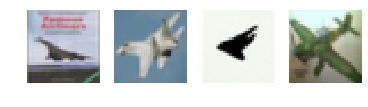

適合率 : 0.58
再現率 : 0.53
F値 :　　　　　 0.55

1


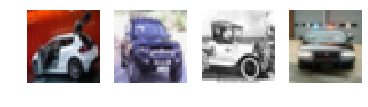

適合率 : 0.57
再現率 : 0.7
F値 :　　　　　 0.63

2


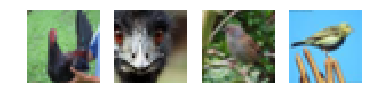

適合率 : 0.53
再現率 : 0.26
F値 :　　　　　 0.35

3


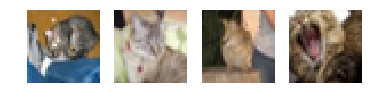

適合率 : 0.37
再現率 : 0.32
F値 :　　　　　 0.34

4


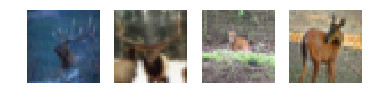

適合率 : 0.49
再現率 : 0.31
F値 :　　　　　 0.38

5


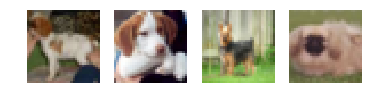

適合率 : 0.45
再現率 : 0.42
F値 :　　　　　 0.43

6


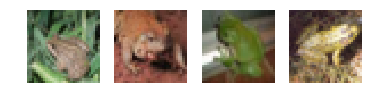

適合率 : 0.48
再現率 : 0.73
F値 :　　　　　 0.58

7


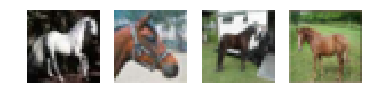

適合率 : 0.58
再現率 : 0.63
F値 :　　　　　 0.6

8


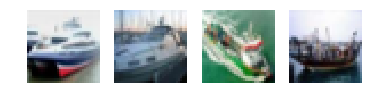

適合率 : 0.71
再現率 : 0.61
F値 :　　　　　 0.66

9


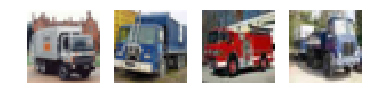

適合率 : 0.48
再現率 : 0.72
F値 :　　　　　 0.58



In [4]:
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
    
argmax_predict_x = np.argmax(predict_x,axis=1)
argmax_true_x = np.argmax(y_test,axis=1)
predict_x_result = argmax_predict_x == argmax_true_x


total = 0
sample_image_num = 4
for num_class in range(num_classes):
    print(num_class)
    imgs = x_test[np.argmax(y_test,axis=1) == num_class][0:sample_image_num]
    for img in imgs:
        total+=1
        plt.subplot(1, sample_image_num, total)
        plt.axis("off")
        plt.imshow(img)
    plt.show()    
    total = 0
    
    TP = np.sum((argmax_true_x==num_class) & (argmax_predict_x==num_class) == True)
    FN = np.sum((argmax_true_x==num_class) & (argmax_predict_x!=num_class) == True)
    FP = np.sum((argmax_predict_x==num_class) & (argmax_true_x!=num_class) == True)
    TN = np.sum((argmax_predict_x!=num_class) & (argmax_true_x!=num_class) == True)
    
    accuracy = round((TP+TN) / (TP+FP+TN+FN),2)
    precision =  round((TP) / (TP+FP),2)
    recall =  round((TP) / (TP+FN),2)
    specificity =  round((TN) / (FP+TN),2)
    fmean =  round((2 * recall * precision) / (recall+precision),2)
    
#     print(TP, FP, TN, FN )
#     print(accuracy,precision,recall,fmean )
#     print("正解率 : {}".format(accuracy))
    print("適合率 : {}".format(precision))    
    print("再現率 : {}".format(recall))    
#     print("特異度 : {}".format(specificity))    
    print("F値 :　　　　　 {}".format(fmean))    
    print("")
